## 계층적 군집
* 군집트리, 텐드로그램을 생성하여 다양한 데이터를 그룹화
* 비슷한 군집끼리 묶어가며 최종적으로 하나의 군집단으로 묶는 기법
* 즉, 군집간의 거리를 기반으로 군집화하는 방식으로
  기존의 군집기법(kmeans)에 비해 군집수를 지정할 필요 X
* 계층적 군집의 종류는 응집형, 분리형
    + 응집형 : 개별데이터 군집 => 군집단 형성
    + 분리형 : 데이터 전체를 하나의 군집 => 세부적으로 여러 군집으로 나눔

<img src='../img/dendrogram.png'>

## mglearn 패키지
* 터미널에서 설치 : <font color="red">pip install mglearn</font>
* "파이썬 라이브러리를 활용한 모신러닝"의 저자가 교육용으로 만든 패키지<br>
  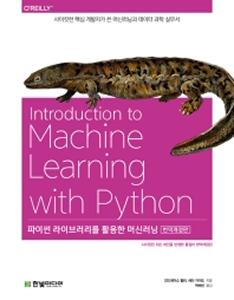


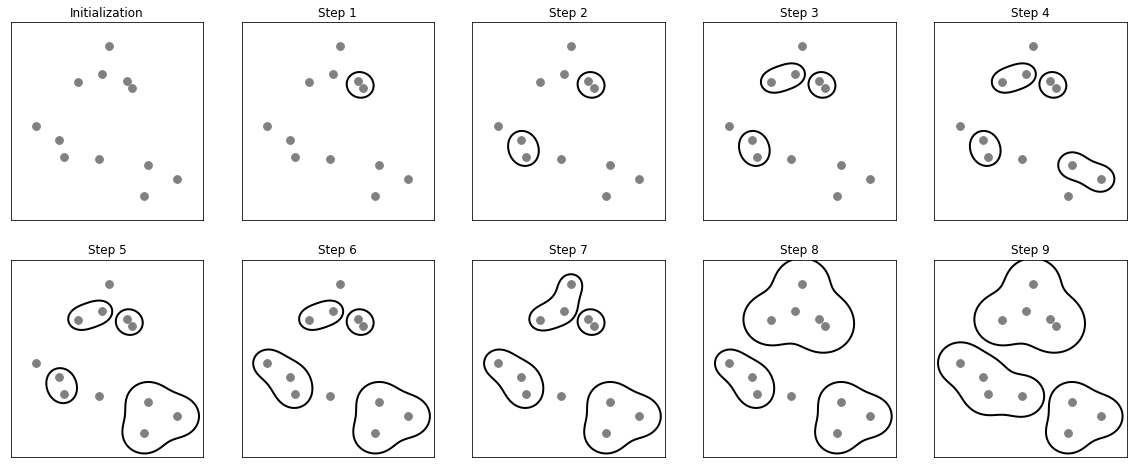

In [2]:
import mglearn

mglearn.plots.plot_agglomerative_algorithm()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

from sklearn.metrics import silhouette_score

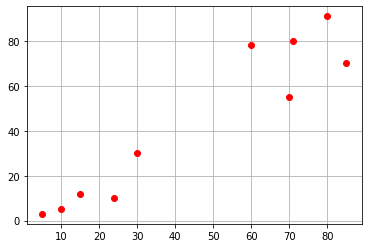

In [4]:
# 덴드로그램 시각화
X = np.array([ [5,3], [10,5], [15,12],
               [24,10], [30,30], [85,70],
               [71,80], [60,78], [70,55],
               [80,91] ])

plt.plot(X[:, 0], X[:, 1], 'ro')
plt.grid()

## 덴드로그램 작동원리
* linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정<br>
  => single/average/complete/centeroid/ward
* 단일single    : 각 군집을 대상으로 최소거리 기준 (가까운것부터 군집)
* 평균average   : 각 군집을 대상으로 평균거리 기준
* 최대complete  : 각 군집을 대상으로 최대거리 기준 (먼것부터 군집)
* 중심centeroid : 각 군집내 중심점 기준
* 와드ward      : 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용

<img src='../img/linkage.png' width='75%'>

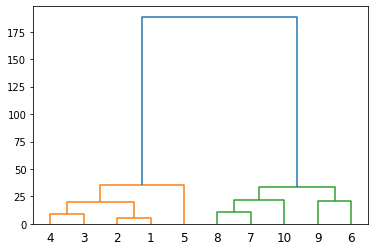

In [4]:
# linkage(객체, method=거리계산법)
linked = linkage(X, method='ward')

# orientation : 덴드로그램 그래프 출력 방향 - 'top', 'left', 'bottom', 'right'
# distance_sort : 군집간 거리 출력순서
# show_leaf_counts : 군집 가지수 출력
dendrogram(linked, orientation='top', 
           labels=range(1,11), 
           distance_sort='descending', 
           show_leaf_counts=True)
plt.show()           

## 군집을 나눌 때 적절한 군집간 distance는?
* 덴드로그램을 보고 n개의 군집을 나눌려고 할 때 적절한 y축값은?
* 덴드로그램에서는 밑에서 위로 올라갈수록 
  군집을 의미하는 선의 갯수가 줄어듬 (응집형 군집)
* scipy에서는 fcluster함수를 이용해서
  distance가 특정값일 때 군집 정보를 알려줌

In [5]:
# fcluster(연결방식, 거리, 거리측정방식)
clusters = fcluster(linked, 20, criterion='distance')
nc = np.unique(clusters)
np.count_nonzero(nc)

6

In [6]:
# 군집간 거리를 30으로 늘리면 군집의 갯수는?
clusters = fcluster(linked, 30, criterion='distance')
nc = np.unique(clusters)
np.count_nonzero(nc)

4

## sklean으로 응집형 군집 실시
* AgglomerativeClustering 패키지 사용

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=1, 
                                  affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

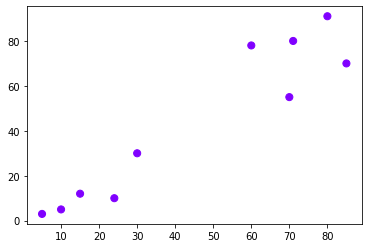

In [9]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, 
            s=50, cmap='rainbow')

In [10]:
from sklearn.datasets import load_iris

## iris 데이터셋을 응집형 군집으로 나눠봄 1
* 군집간 연결방식 : average, ward
* 각 개별적으로 덴드로그램 시각화

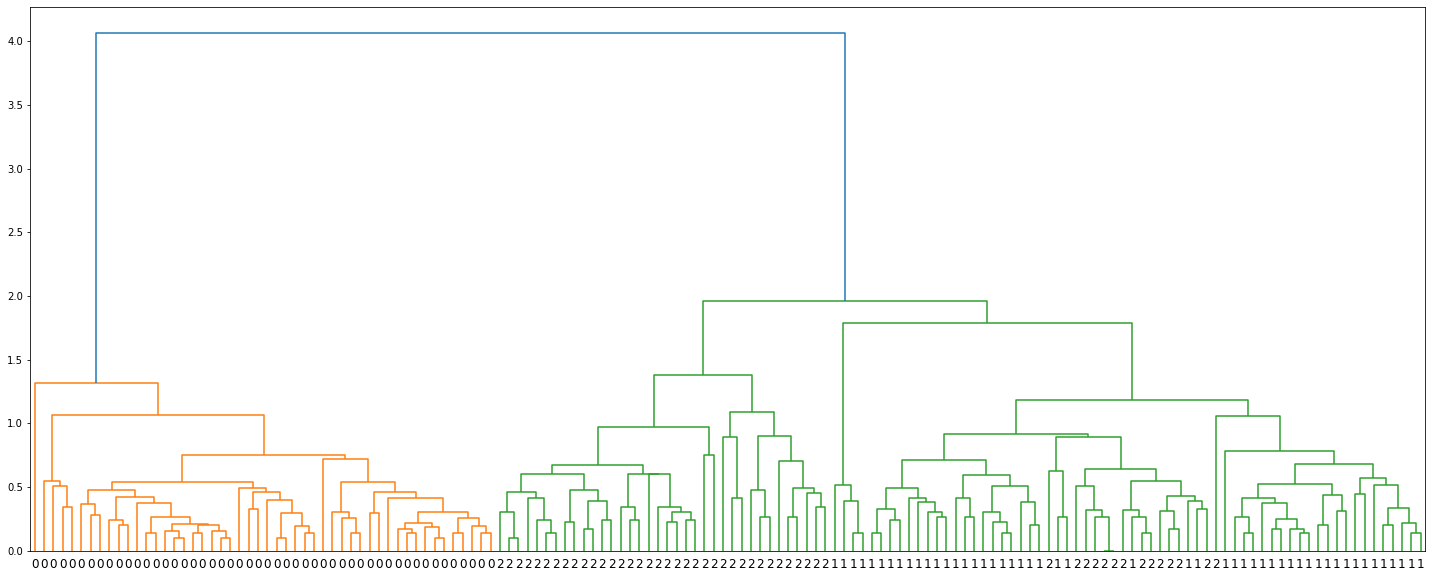

In [11]:
iris = load_iris()

X = iris.data
y = iris.target

# 응집형 군집 1
linked = linkage(X, method='average')

plt.figure(figsize=(25,10))
dendrogram(linked, labels=y, 
           leaf_rotation=0, 
          leaf_font_size=12)
plt.show()           

In [12]:
# 3개의 군집으로 나눌 때 적절한 distance는?
fcluster(linked, 1.8, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

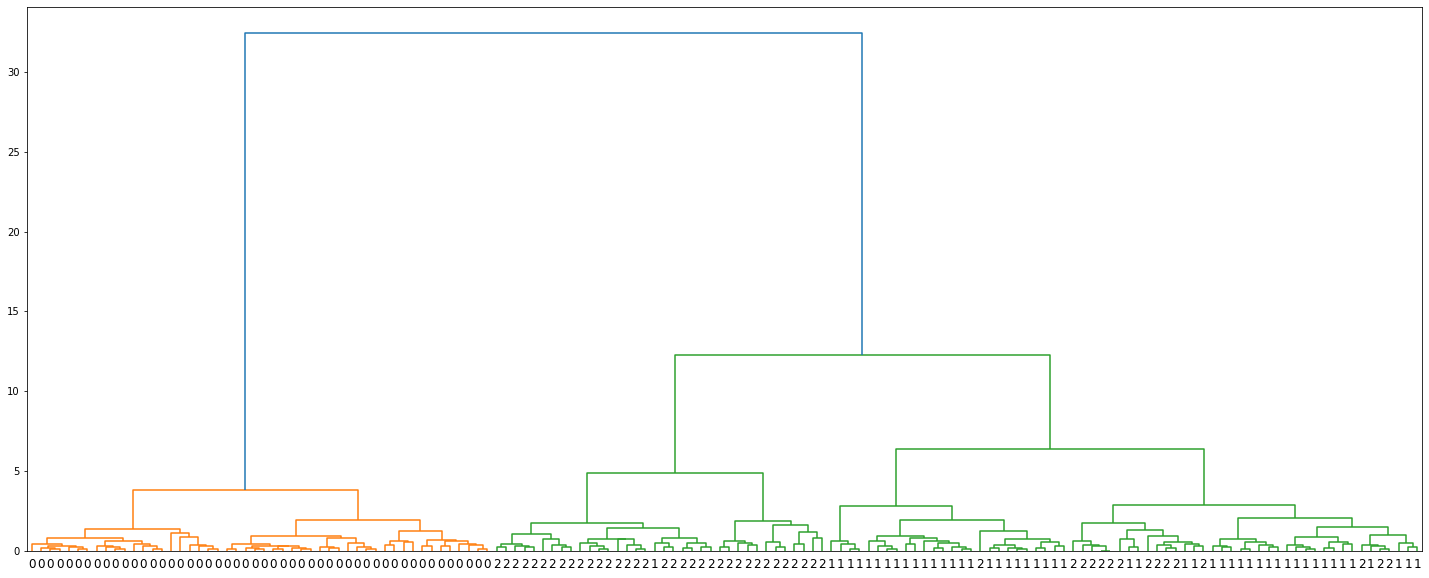

In [13]:
# 응집형 군집 2
linked = linkage(X, method='ward')

plt.figure(figsize=(25,10))
dendrogram(linked, labels=y, 
           leaf_rotation=0, 
          leaf_font_size=12)
plt.show()   

In [14]:
# 3개의 군집으로 나눌 때 적절한 distance는?
fcluster(linked, 10, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [15]:
## iris 데이터셋을 응집형 군집으로 나눠봄 2

In [16]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  affinity='euclidean', linkage='average')
cluster.fit_predict(X)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
silhouette_score(X, cluster.labels_)

0.5541608580282851

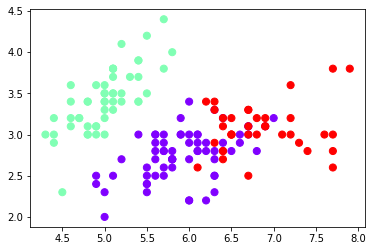

In [18]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

In [19]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
silhouette_score(X, cluster.labels_)

0.5543236611296419

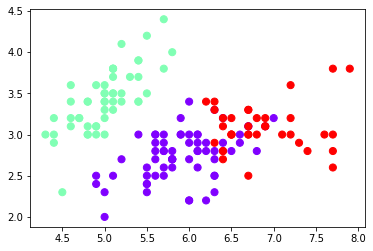

In [21]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

## 실루엣 그래프로 적절한 군집수 확인

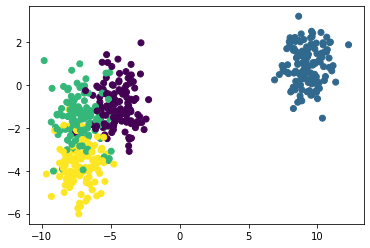

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, 
                 centers=4, cluster_std=1, 
                 random_state=2111161155)
plt.scatter(X[:,0], X[:,1], c=y)

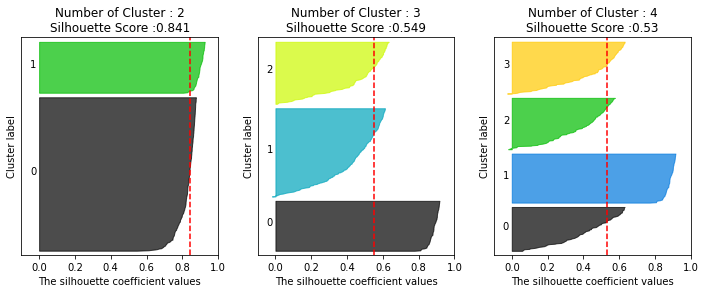

In [27]:
# 클러스터 갯수를 2~4일 때 실루엣계수를 시각화
import mldlpy3

# visualize_silhouette(군집수, 대상객체)
mldlpy3.visualize_silhouette([2,3,4], X)

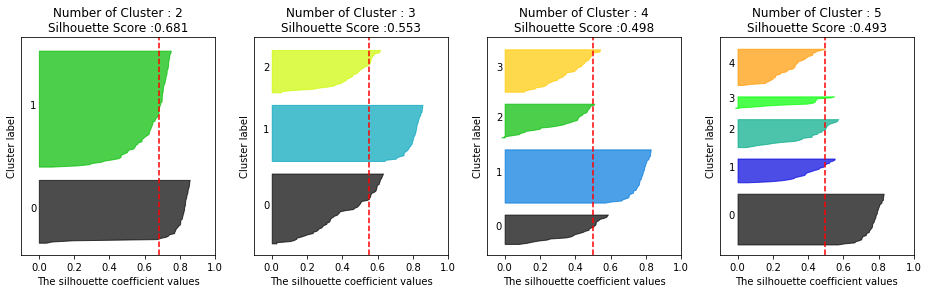

In [42]:
# iris 데이터를 기준을 클러스터 갯수를 2~4일 때 실루엣계수를 시각화
mldlpy3.visualize_silhouette([2,3,4,5], iris.data)

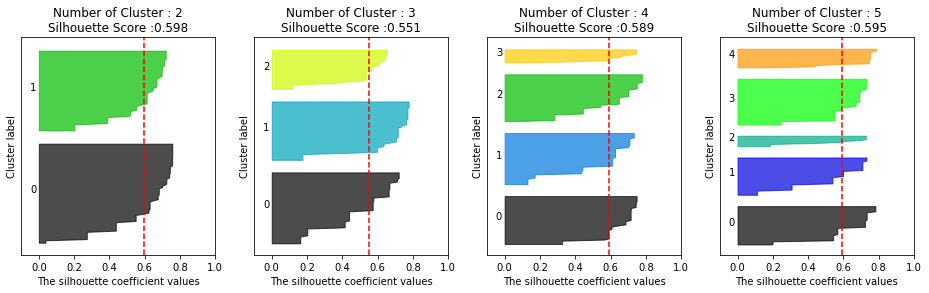

In [43]:
# sepal width/length
mldlpy3.visualize_silhouette([2,3,4,5], iris.data[:, :1])

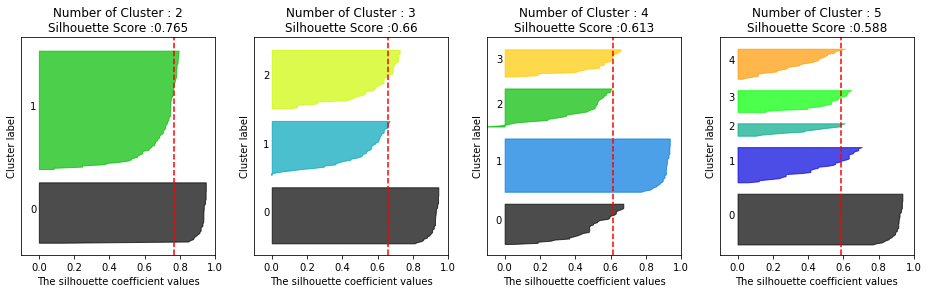

In [40]:
# petal width/length
mldlpy3.visualize_silhouette([2,3,4,5], iris.data[:, 2:4])

In [58]:
# 학생성적과 집중도를 기준을 클래스를 나누려고 할 때 
# 몇 개의 반으로 나누는 것이 좋을지
# 텐드로그램으로 시각화해 보세요. (연결방식 : average)
ac = pd.read_csv('../data/academy.csv', encoding='euc-kr')
ac.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [59]:
X = ac.iloc[:, 1:]
linked = linkage(X, method='average')
linked[:5]

array([[30.        , 51.        ,  4.12310563,  2.        ],
       [37.        , 41.        ,  4.79583152,  2.        ],
       [18.        , 19.        ,  7.        ,  2.        ],
       [23.        , 47.        ,  7.07106781,  2.        ],
       [ 0.        , 14.        ,  7.28010989,  2.        ]])

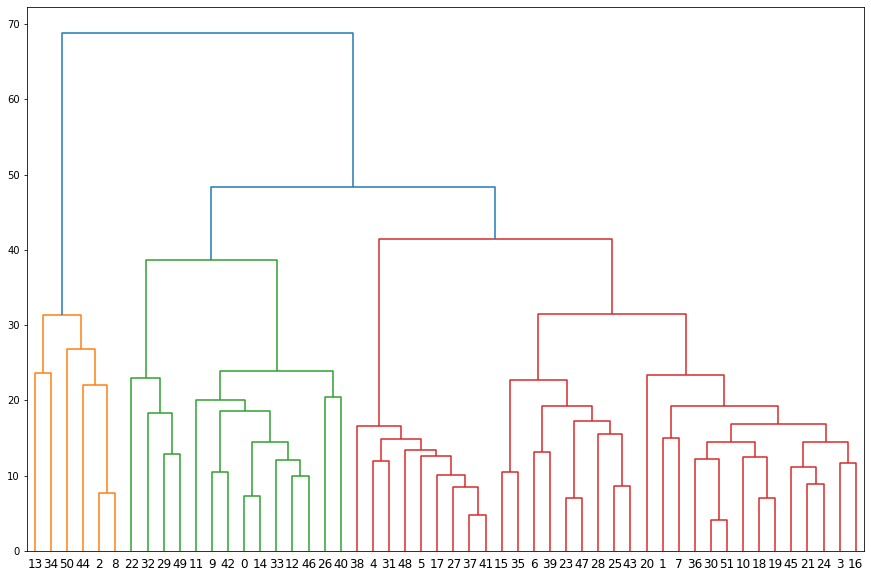

In [60]:
plt.figure(figsize=(15,10))
dendrogram(linked, leaf_rotation=0, leaf_font_size=12)
plt.show()

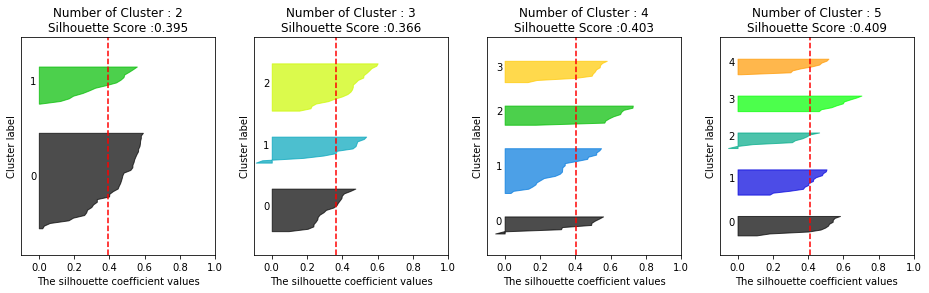

In [61]:
# 군집갯수별 실루엣계수 확인
mldlpy3.visualize_silhouette([2,3,4,5], X)

In [62]:
cluster = AgglomerativeClustering(n_clusters=3, 
                               affinity='euclidean', linkage='average')
cluster.fit_predict(X)

array([2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 2, 1, 0])

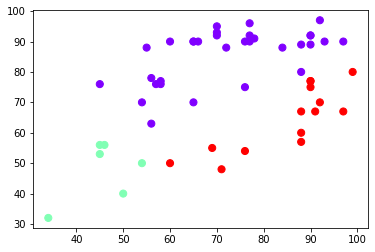

In [63]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], 
            c=cluster.labels_, s=50, cmap='rainbow')

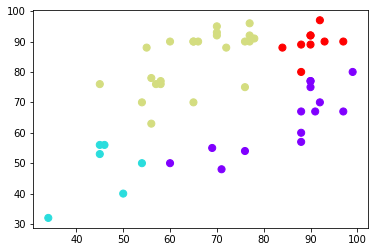

In [64]:
cluster = AgglomerativeClustering(n_clusters=4, 
                               affinity='euclidean', linkage='average')
cluster.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], 
            c=cluster.labels_, s=50, cmap='rainbow')

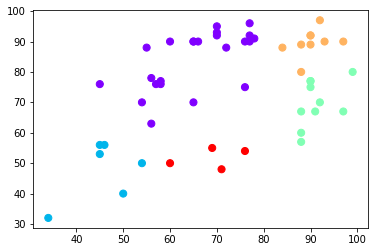

In [65]:
cluster = AgglomerativeClustering(n_clusters=5, 
                               affinity='euclidean', linkage='average')
cluster.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], 
            c=cluster.labels_, s=50, cmap='rainbow')

In [ ]:
# 결론 : 응집형으로 나누는 경우 실루엣 계수가 높은 군집수는 5개가 적당

## ggplot2에서 제공하는 다이아몬드 데이터셋을 이용해서 군집분석 실시
* 가격, 캐럿수, 깊이, 테이블만 추출해서 군집 수행

In [5]:
dia = pd.read_csv('csv/diamonds.csv')#, encoding='euc-kr')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
X = dia.iloc[:, 3:7]
y = dia.iloc[:, 0]
X.head()

,clarity,depth,table,price
0,SI2,61.5,55.0,326
1,SI1,59.8,61.0,326
2,VS1,56.9,65.0,327
3,VS2,62.4,58.0,334
4,SI2,63.3,58.0,335
